# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data =  '/Users/YenLin/Desktop/ML_100/data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[ col ].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len( list( app_train[ col ].unique( ) ) ) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[ col ] = le.fit_transform( app_train[ col ] )            
print( app_train.shape )
app_train.head( )

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train[ 'DAYS_EMPLOYED_ANOM' ] = app_train[ "DAYS_EMPLOYED" ] == 365243
app_train[ 'DAYS_EMPLOYED' ].replace( { 365243 : np.nan }, inplace = True )

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs( app_train[ 'DAYS_BIRTH' ] )
app_train.head( 20 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.000,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.000,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.000,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.000,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.000,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,100008,0,0,M,0,1,0,99000.000,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,False
6,100009,0,0,F,1,1,1,171000.000,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,False
7,100010,0,0,M,1,1,0,360000.000,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
8,100011,0,0,F,0,1,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
9,100012,0,1,M,0,1,0,135000.000,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False


## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
age_data = app_train.loc[ :, [ 'TARGET', 'DAYS_BIRTH' ] ] # subset
age_data[ 'YEARS_BIRTH' ] = age_data[ 'DAYS_BIRTH' ] / 365 # day-age to year-age
age_data.head( 10 )

,TARGET,DAYS_BIRTH,YEARS_BIRTH
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219
5,0,16941,46.413699
6,0,13778,37.747945
7,0,18850,51.643836
8,0,20099,55.065753
9,0,14469,39.641096


In [6]:
bins = [ 0, 10, 20, 30, 50, 60, 70, 80, 90, 100]
age_data[ 'Age_grp' ] = pd.cut( age_data[ 'YEARS_BIRTH' ], bins )
age_data.head( 10 )

,TARGET,DAYS_BIRTH,YEARS_BIRTH,Age_grp
0,1,9461,25.920548,"(20, 30]"
1,0,16765,45.931507,"(30, 50]"
2,0,19046,52.180822,"(50, 60]"
3,0,19005,52.068493,"(50, 60]"
4,0,19932,54.608219,"(50, 60]"
5,0,16941,46.413699,"(30, 50]"
6,0,13778,37.747945,"(30, 50]"
7,0,18850,51.643836,"(50, 60]"
8,0,20099,55.065753,"(50, 60]"
9,0,14469,39.641096,"(30, 50]"


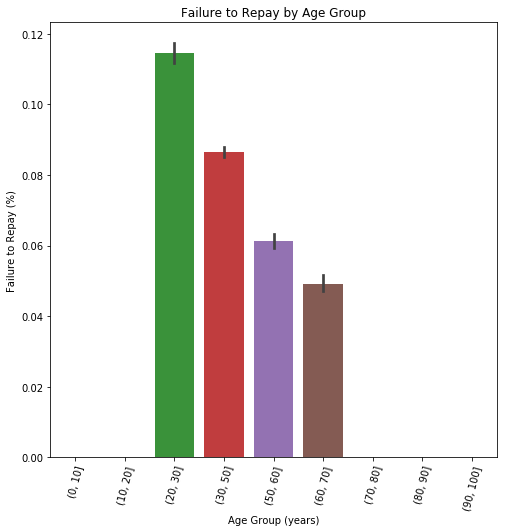

In [7]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = age_data[ 'Age_grp' ]
py = age_data[ 'TARGET' ]
sns.barplot( px, py )

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');